# Introduction to Analysing the Stock Market
## By Alejandro Rigau
5/17/2021
---

# Overview
---
In this tutorial, I'll provide you with a basic overview of analyzing and comprehending stock market data in the hope of providing you with useful information to help you buy and sell stocks wisely. Investors go to the stock market to buy and sell *stocks*. Stocks can be thought of as a small part of a company. This means that when you purchase a stock, you become a shareholder in the company and you will only own a **very** small percentage of it. Companies typically have millions of stocks (also known as shares) that they sell to investors. As a result, the more stocks you purchase, the more ownership you have in the company. 

Another thing to keep in mind is that stock prices fluctuate. When someone agrees to buy shares at a higher or lower price than the previous transaction, stock prices rise and fall. In the short term, supply and demand drive this dynamic.

The stock market can be difficult to understand at times, and my goal with this tutorial is to provide tools for future investors to use before purchasing a stock in order to make more informed decisions based on data analysis. When making these critical decisions, we'll look at what to try and what to avoid.

# 1. The Data
---
I'll use publicly available historical stock price data for our dataset. There are numerous sources for this information, but we will use the library **yfinance** due to its ease of use. yfinance is an abbreviation for Yahoo Finance, and they have had a stock market data API for quite some time. Other companies, such as Google and Robinhood, have stock market data APIs, but yfinance has always been very user-friendly. I have arbitrarily selected Tesla's stock for our analysis. 

## 1.1 Understanding the Data
Our data is returned in a pandas dataframe which contains the following columns:  

1. **Date:** The date for the entry.
2. **Open:** The price of the stock when the market opened that day. Stock maket operates 9:30 a.m. to 4 p.m. Eastern time on weekdays.
3. **High:** Highest stock price this day.
4. **Low:** Lowest stock price this day.
5. **Close:** The price at the end of the trading day. 
6. **Adj Close:** The same as **Close** but this price factors in things like dividends, stock splits and new stock offerings.
7. **Volume:** Integer that indicates how many stocks were traded that day.

## 1.2 Getting the Data
Next, I'll show you how to get the data from yfinance. Even though I requested one year of data, the returned dataframe only has 252 rows. This is due to the fact that not every day is a trading day. Because the stock market is closed on weekends and certain holidays, our data is even more limited. yFinance takes care of handling those missing days and therfore we wont have to worry about any missing values in our data. Finally, I'll use a plot to show how Tesla's stock data changed throughout the year.

In [1]:
# Import all the libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import yfinance as yf
# Query the data
df = yf.download("TSLA", interval="1d", period="1y")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-15,158.070007,161.009995,157.309998,159.834000,159.834000,52592000
2020-05-18,165.556000,166.944000,160.776001,162.725998,162.725998,58329000
2020-05-19,163.033997,164.414001,161.216003,161.602005,161.602005,48182500
2020-05-20,164.100006,165.199997,162.360001,163.112000,163.112000,36546500
2020-05-21,163.199997,166.500000,159.199997,165.520004,165.520004,61273000
...,...,...,...,...,...,...
2021-05-10,664.900024,665.049988,627.609985,629.039978,629.039978,31392400
2021-05-11,599.239990,627.099976,595.599976,617.200012,617.200012,46503900
2021-05-12,602.489990,620.409973,586.770020,589.890015,589.890015,33823600


Because we will only be using the **Close** and **Date** columns for our analysis, I will delete the other cloumns. We will be left with just two columns but there is a lot of analysis that can be done with this time series data. 

In [3]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

Text(0.5, 1.0, 'Tesla Stock Price for the past year')

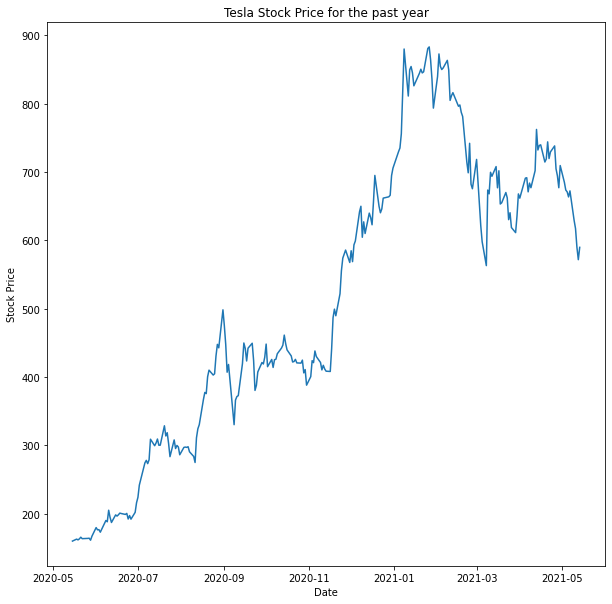

In [4]:
plt.figure(figsize=(10,10))
plt.plot(df.index, df['Close'])
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price for the past year")

# 2. Exploratory Data Analysis
---
To better understand our data and try to get a sence of how to predict the stock price, we need some indicators to tell us when is a good time to buy a stock and when is a good time to sell it. We will explore different strategies and indicators that will help us better understand what is happening with our stock data.  

## 2.1 Moving averages
A moving average is a price fluctuation indicator that smoothes the volatility of daily price changes by filtering out the noise from random short-term or long-term price fluctuations. This means that we can see where the price is going and decide whether we want to buy the stock or not. Remember, our goal is to be able to buy low and sell high in order to make a profit. To calculate the moving average, we take the mean of the previous X number of days and use that value to plot the line. Different moving average lines can be constructed by specifying different sized windows, and we will use a 10 day window for short-term filtering and a 50 day window for long-term filtering in our analysis.

More about Moving Average: https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [5]:
df["SMA1"] = df['Close'].rolling(window=10).mean()
df["SMA2"] = df['Close'].rolling(window=50).mean()
df

,Close,SMA1,SMA2
Date,,,
2020-05-15,159.834000,NaN,NaN
2020-05-18,162.725998,NaN,NaN
2020-05-19,161.602005,NaN,NaN
2020-05-20,163.112000,NaN,NaN
2020-05-21,165.520004,NaN,NaN
...,...,...,...
2021-05-10,629.039978,677.996997,680.056598
2021-05-11,617.200012,669.242999,678.031998
2021-05-12,589.890015,658.791998,676.100999


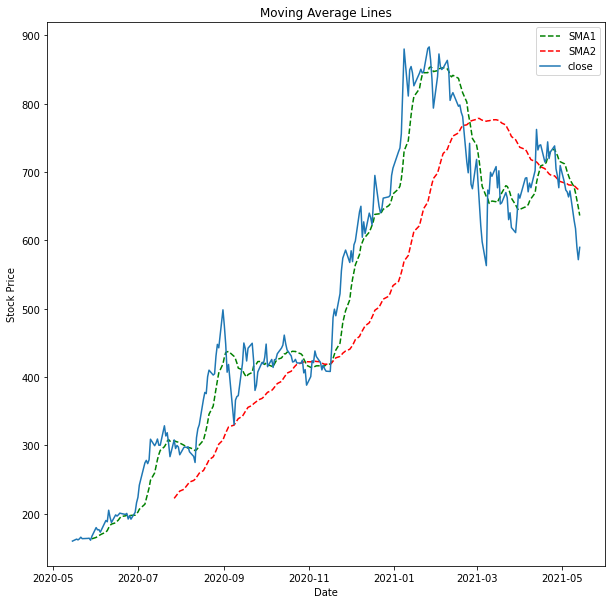

In [6]:
plt.figure(figsize=(10,10))
plt.plot(df['SMA1'], 'g--', label="SMA1")
plt.plot(df['SMA2'], 'r--', label="SMA2")
plt.plot(df['Close'], label="close")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Moving Average Lines")
plt.legend()
plt.show()

Because we have two lines, we can use the moving average crossover trading strategy. If you look at our graph, you'll notice that the two lines cross exactly when the stock price begins to fall. The crossing of the two lines indicates that it may be advisable to take a specific stance. When the shorter-term moving average crosses above the longer-term moving average, it is usually a buy signal. When the shorter term falls below the long term, it is time to sell. Because the long-term line takes longer to reflect price fluctuations, the short-term line will cross under it since it updates faster.

## 2.2 Bollinger Bands
Bolinger bands are lines that help investores determine if the stock price is overbought or oversold. They are a set of trendlines plotted two standard deviations away from a moving average line.

1. Middle Band = 20-day simple moving average (SMA)
2. Upper Band = Moving Average + (20-day standard deviation of price x 2)
3. Lower Band = Moving Average – (20-day standard deviation of price x 2)  

Bollinger Bands act as an envelope around a stock's price, illustrating its relative strength. When a stock's price is considered oversold, it is near the lower band, and when it is considered overvalued, it is near the upper band. Because the bands are an assessment of strength, they are frequently used in conjunction with another indicator to make an informed decision about a position. For our analysis, I will use a 20-day moving average and a 20-day standard deviation. This can be adjusted based on user preference but this values seem to work well. 

More about Bollinger Bands: https://www.investopedia.com/terms/b/bollingerbands.asp

In [7]:
df['middle_band'] = df['Close'].rolling(window=20).mean()
df['upper_band'] = df['Close'].rolling(window=20).mean() + df['Close'].rolling(window=20).std()*2
df['lower_band'] = df['Close'].rolling(window=20).mean() - df['Close'].rolling(window=20).std()*2

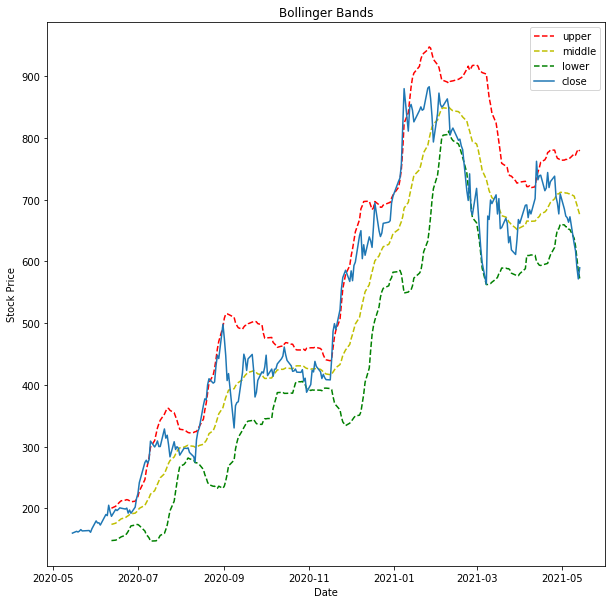

In [8]:
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'], 'r--', label="upper")
plt.plot(df['middle_band'], 'y--', label="middle")
plt.plot(df['lower_band'], 'g--', label="lower")
plt.plot(df['Close'], label="close")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Bollinger Bands")
plt.legend()
plt.show()

## 2.3 Google Trends
Google Trends is a search trends feature that displays the frequency with which a given search term is entered into Google's search engine in comparison to the site's total search volume over a given time period. This can be useful because the stock price is primarily determined by supply and demand, and having a large number of people talking about the stock is a good enough reason for a large price fluctuation. Essentially, we can determine when a term is searched at an unusually high rate and use this to predict whether the stock price will change. I'll query Google's API with the **Pytrends** library to retrieve the trendline for the keyword "tesla stock."

You can give Google Trends a try here: https://trends.google.com/trends/?geo=US

In [9]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl="en-US", tz=360)

keyword = ["tesla stock"]

pytrends.build_payload(kw_list = keyword, timeframe="today 12-m")


pytrends_data = pytrends.interest_over_time()

pytrends_data.head()

,tesla stock,isPartial
date,,
2020-05-17,13,False
2020-05-24,13,False
2020-05-31,18,False
2020-06-07,27,False
2020-06-14,18,False


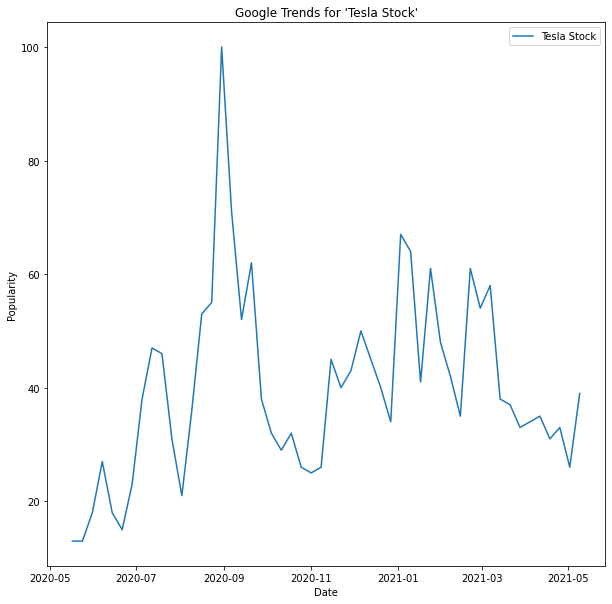

In [10]:
plt.figure(figsize=(10,10))
plt.plot(pytrends_data["tesla stock"], label="Tesla Stock")
plt.xlabel("Date")
plt.ylabel("Popularity")
plt.title("Google Trends for 'Tesla Stock'")
plt.legend()
plt.show()

The "tesla stock" column represents search interest relative to the chart's highest point for the given region and time. A value of 100 represents the term's peak popularity. A score of 50 indicates that the term is only half as popular. A score of 0 indicates that there was insufficient data for this term. The column "isPartial" will not be used, but this field indicates whether or not the data point is complete for that specific date.

Next, I will drop the "isPartial" column and normalize the stock data and the Google Trends data. I want to normalize them because I want to be able to plot both lines one on top of the other. This will shows us if the stock price is correlated with the Google Trend.

In [11]:
pytrends_data = pytrends_data.drop(['isPartial'], axis = 1)

In [12]:
normalized_df=(df["Close"]-df["Close"].mean())/df["Close"].std()
normalized_data=(pytrends_data-pytrends_data.mean())/pytrends_data.std()

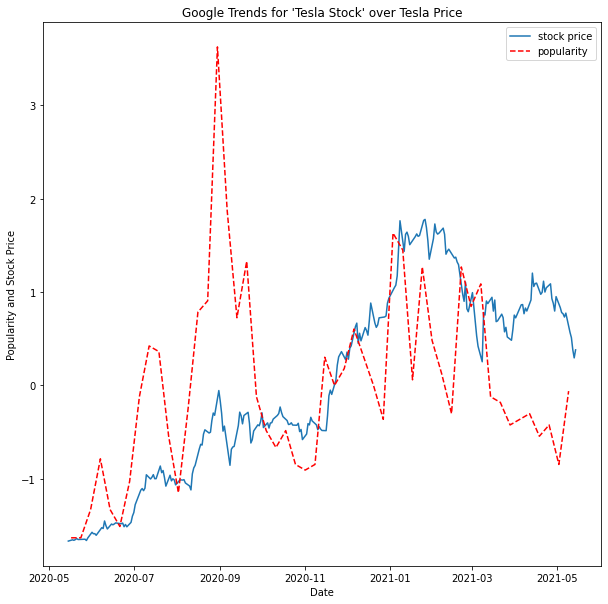

In [13]:
plt.figure(figsize=(10,10))
plt.plot(normalized_df, label="stock price")
plt.plot(normalized_data, 'r--', label="popularity")
plt.xlabel("Date")
plt.ylabel("Popularity and Stock Price")
plt.title("Google Trends for 'Tesla Stock' over Tesla Price")
plt.legend()
plt.show()

The graph shows that the price does indeed fluctuate when the Google Trends data reaches a peak. A peak in the Google Trends data appears to indicate that the price will either go up or down, allowing an investor to prepare for either a sudden drop or a sudden increase. This does not let an investor know if the price fluctuation will go in a specific direction but this indicator can be especially useful when combined with other indicators such as Bollinger Bands to determine whether the price movement will be upward or downward.

# 3. Algorithmic Trading
---
In this section we are going to do some algorythmic trading simulations to compare some of our previously mentioned trading strategies. We will try:  

1. Random Traiding
2. Buy and Hold Strategy
3. Moving Average
4. Bollinger Bands
5. Machine Learning Model (SVM)

We will test the hypothesis that the Buy and Hold strategy is usually a better trading strategy than using fancy indicators. 

## 3.1 Random Traiding
As a baseline, I will run a random trading model. This model will buy a stock on the first day and randomly decide wether to sell or buy the stock again. It can only have one stock at a time. It will do this every day for the whole year. Since this model is completely random, I will run it 1000 times and calculate our average winnings. 

In [14]:
import random

total_money = 0
total_runs = 1000
for run in range(total_runs):
    money = -df["Close"][0]
    num_stocks = 1
    for price in df["Close"]:
        choice = random.randint(0, 1)
        if choice == 1 and num_stocks == 0:
            money -= price
            num_stocks = 1
        else:
            if num_stocks == 1:
                num_stocks -= 1
                money += price

    money += num_stocks*df["Close"][-1]
    total_money += money
total_money/total_runs

138.35539083862304

Our clumsy model has made money! This is not surprising given that the general trend of the Tesla stock has been upward. no matter what you do, it is difficult to lose money in this scenario. This will not always be the case, but it is still fascinating to watch in action.

## 3.2 Buy and Hold
Our goal is to outperform a random model and hopefully make money without getting lucky. We want to find a strategy that would work no matter the direction of the trend of the data. Buy and Hold is a strategy in which you buy a stock and hold it for an extended period of time. It is sometimes preferable to simply ride the stock's upward trend rather than worry about all of the ups and downs in between. To test this, I simulated buying a stock at the beginning of the year and then selling it at the end. 

In [15]:
money = -df["Close"][0] 
money += df["Close"][-1] 
money

429.90599060058594

This is a significant improvement. We made roughly three times as much money with the Buy and Hold strategy as we did with a random model.

## 3.3 Moving Average
As previously mentioned, we can use the moving average crossover as buying indicators. The crossovers would indicate that we should buy or sell the stock depending on which direction the lines crossed. We will be using the moving average from the day before to determine if we will buy on the current day. I will also plot markers in our plot indicating where our model will be buying or selling. Red indicator signals a Sell while a Green indicator signals a buy. We will also assume that we buy the stock at the first day and later decide when to sell and buy again.

In [16]:
diff = df['SMA1'] < df['SMA2']
diff_prev = diff.shift(1)
# Using booleans as ints (True = 1 and False = 0) 
buys = np.where(diff - diff_prev == -1)[0]
sells = np.where(diff - diff_prev == 1)[0]
buy_date = df.iloc[buys]
sell_date = df.iloc[sells]

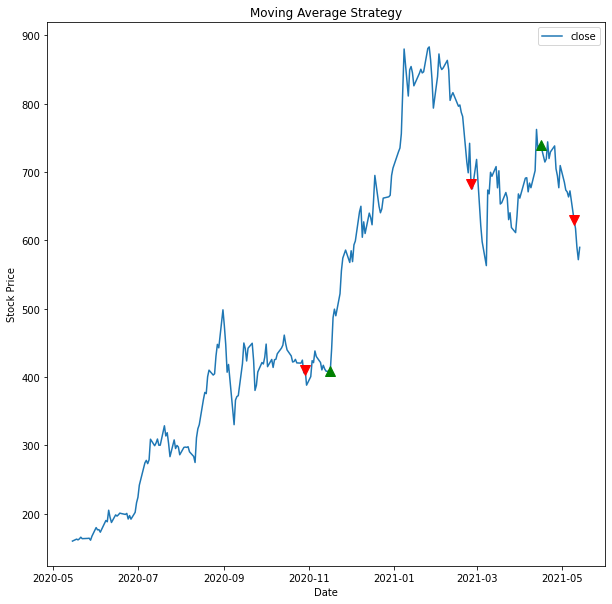

In [17]:
plt.figure(figsize=(10,10))
plt.plot(df['Close'], label="close")
plt.plot(sell_date.index, sell_date["Close"], 'v', markersize=10, color='r')
plt.plot(buy_date.index, buy_date["Close"], '^', markersize=10, color='g')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Moving Average Strategy")
plt.legend()
plt.show()

In [18]:
# Moving Average Crossover Strategy
# Assuming we buy at day 1
money = -df["Close"][0] 
money -= buy_date["Close"].sum()
money += sell_date["Close"].sum()

money

414.3859100341797

As we can see from the graph, the model can react fairly well when the price falls and triggers a sell, while also triggering a buy when the price begins to rise. We can also see that by the end of the graph, the model appears to have determined incorrectly that it should buy at the final peak and sell at the bottom. This demonstrates that the model is not perfect, but it performs admirably. When compared to Buy and Hold, it appears to lag slightly, but it has proven to be a profitable strategy nonetheless. We must keep in mind that this can be combined with other indicators to help us make better decisions than the one shown here.

## 3.4 Bollinger Bands
We'll do the same thing here, but this time with the Bollinger Bands indicator. The model will trigger a sell where the upper line intersects the actual stock price, and a buy where the stock price intersects the lower line. I'll also put markers in our plot to show where our model will buy and sell. As previously stated, a red indicator indicates a sell and a green indicator indicates a buy. We will also assume that we purchase the stock on the first day and then decide when to sell and repurchase it.

In [19]:
diff = df['upper_band'] < df['Close']
diff_prev = diff.shift(1)
# Using booleans as ints (True = 1 and False = 0) 
crossing = np.where(abs(diff - diff_prev) == 1)[0]
sells = df.iloc[crossing]

diff = df['lower_band'] < df['Close']
diff_prev = diff.shift(1)
# Using booleans as ints (True = 1 and False = 0) 
crossing = np.where(abs(diff - diff_prev) == 1)[0]
buys = df.iloc[crossing]

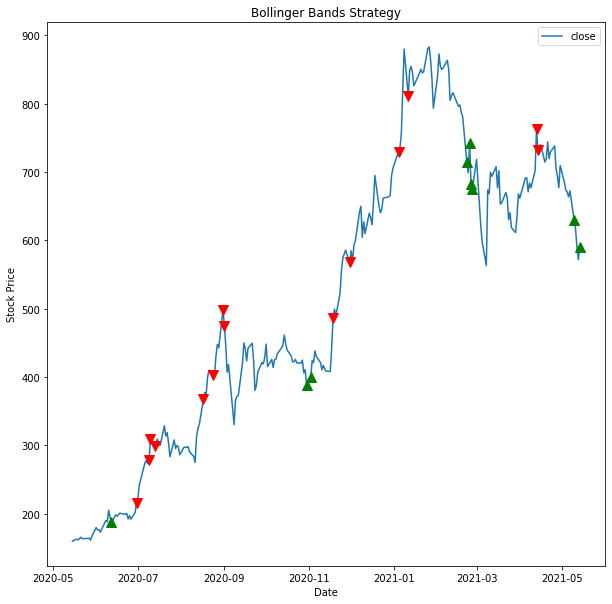

In [20]:
plt.figure(figsize=(10,10))
plt.plot(df['Close'], label="close")
plt.plot(sells.index, sells["Close"], 'v', markersize=10, color='r')
plt.plot(buys.index, buys["Close"], '^', markersize=10, color='g')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Bollinger Bands Strategy")
plt.legend()
plt.show()

It is difficult to tell whether this model is good or not based on the obtained graph. If we only traded one stock, this model would always sell too soon, missing out on a lot of potential gain. If, on the other hand, we buy a large amount of stock during our buy signals, we can sell a small amount whenever the model generates a sell signal. This has the potential to make significantly more money than a simple Buy and Hold strategy, but it must be combined with some sort of model that can determine how much to sell in a given day. For the purposes of this tutorial, it should suffice to demonstrate that this model has a great deal of potential in providing us with valuable insight into our data.

## 3.5 Machine Learning (SVM)
In this section, we will attempt to train a Support Vector Machine to forecast whether the stock price will rise or fall in the future. Based on this prediction, the model will buy or sell on the current day. The current price will be our model's input, and the labels will be either a 1 or a -1. If the price is higher 20 days from now, a 1 will be used as a label; if it is lower, a -1 will be used. After being trained on this data, the model will use the current price to predict whether the stock price will rise in the future. This is a fairly naive strategy, but it is not entirely futile.

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

days_future = 20
df['prediction'] = np.sign(df['Close'].shift(-days_future) - df['Close'])
X = np.array(df['Close'])
X = X[:-days_future]
X = np.reshape(X, (-1, 1))
y = np.array(df['prediction'])
y = y[:-days_future]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
svc = SVC(kernel='rbf', C=1e3, gamma=0.1) 
svc.fit(x_train, y_train)
svc_confidence = svc.score(x_test, y_test)
svc_confidence

0.723404255319149

In [23]:
prediction = np.array(df['Close'])[-days_future:]
prediction = np.reshape(prediction, (-1, 1))
prediction = svc.predict(prediction)

In [24]:
df['pred'] = np.nan #New column with the models predictions
df['pred'][-days_future:] = prediction

In [25]:
df['pred'].tail()

Date
2021-05-10    1.0
2021-05-11    1.0
2021-05-12    1.0
2021-05-13    1.0
2021-05-14    1.0
Name: pred, dtype: float64

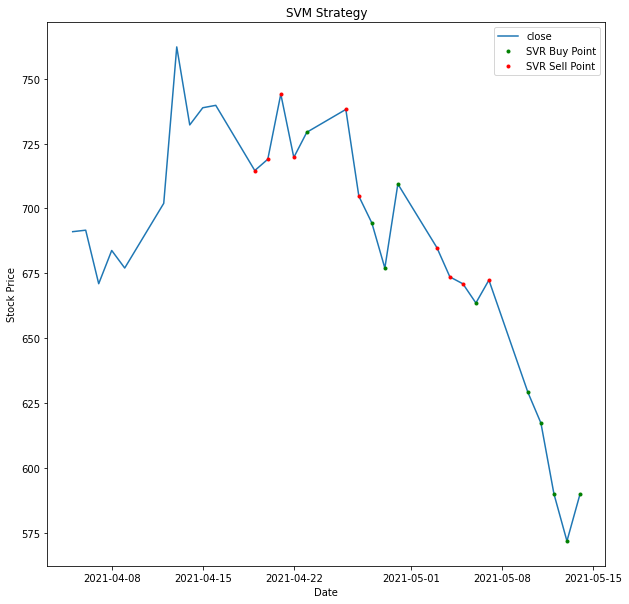

In [26]:
plt.figure(figsize=(10,10))
plt.plot(df['Close'][-days_future -10:], label="close")
plt.plot(df['Close'][df['pred'] > 0], "g.", label="SVR Buy Point")
plt.plot(df['Close'][df['pred'] < 0], "r.", label="SVR Sell Point")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("SVM Strategy")
plt.legend()
plt.show()

As previously stated, it is extremely difficult to test the model's performance without performing a full backtest, but the graph shows that the results are not too bad. Again, buy and sell indicators are slightly erratic and can miss out on a significant amount of potential profit. Although the model's confidence is higher than expected, it does not appear to perform at that level. Despite this, the graph shows that this model outperforms a random model because it appears to buy and sell when it should.

# 4. Conclusions
In this tutorial, I demonstrated how to collect stock market data, pre-process it, and create useful tools and visualizations to assist an investor in making a more informed decision by understanding the data. We also discussed the possibility of combining data from Google Trends to help us predict when a major stock movement is about to occur. We also learned how to create various market indicators based on stock price data transformation and analysis. These were then used in a simulated environment to test and visualize our trading strategies. Finally, we discovered that our Buy and Hold strategy is a very reliable strategy when the stock's usual trend is up, and we discovered that Bollinger Bands have great predictive capability but must be combined with another model that tells us how many stocks to buy and sell in a given day. We also demonstrated that stock market data is too complex and indecipherable to be adequately modeled by a Support Vector Machine. If we want to explore more ML techniques in the future, we will need more complex machine learning models, such as Deep Neural Networks.

If you would like to learn more about stocks, visit: https://www.investopedia.com/trading-skills-and-essentials-4689654